# BIKE STORE SALES    



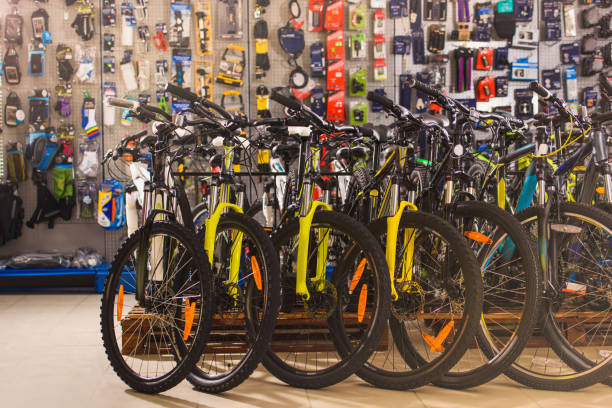

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Loading our data

In [2]:
sales = pd.read_csv("sales_data.csv",
                   parse_dates =['Date'])

In [3]:
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.shape

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
sales.describe(include ="all",datetime_is_numeric=True)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036,113036.000000,113036.000000,113036,113036,113036,113036,113036,113036,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
unique,NaN,NaN,12,NaN,NaN,4,2,6,53,3,17,130,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,June,NaN,NaN,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11234,NaN,NaN,55824,58312,39206,22450,70120,33870,10794,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014-11-23 12:14:55.063519232,15.665753,NaN,2014.401739,35.919212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,NaN,2011.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,NaN,2013.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,NaN,2014.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,NaN,2016.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,NaN,2016.000000,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [10]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


 ## Numerical analysis and Visualization

we will analyze only Unit_Cost column

In [12]:
sales["Unit_Cost"]

0         45
1         45
2         45
3         45
4         45
          ..
113031    24
113032    24
113033    24
113034    24
113035    24
Name: Unit_Cost, Length: 113036, dtype: int64

In [13]:
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [14]:
sales["Unit_Cost"].value_counts()

2       21312
1       14592
13      13960
8        5718
3        5562
9        4920
7        4358
2171     3290
38       3222
1252     3126
1266     3018
42       2788
344      2478
4        2444
713      2156
1482     2036
11       2030
1555     1862
26       1798
1083     1634
487      1362
21       1332
420      1162
12       1006
461       962
24        962
755       702
1519      648
45        596
295       530
308       470
59        452
1898      286
1912      262
Name: Unit_Cost, dtype: int64

In [15]:
sales["Unit_Cost"].mean()

267.296365759581

In [16]:
sales["Unit_Cost"].median()

9.0

In [17]:
sales["Unit_Cost"].sum()

30214112

In [18]:
sales["Unit_Cost"].max()

2171

<AxesSubplot:>

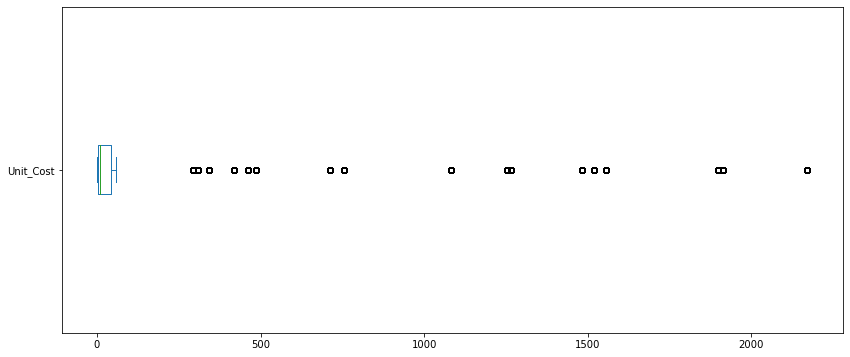

In [19]:
sales["Unit_Cost"].plot(kind = "box", vert = False, figsize = (14,6))

<AxesSubplot:ylabel='Density'>

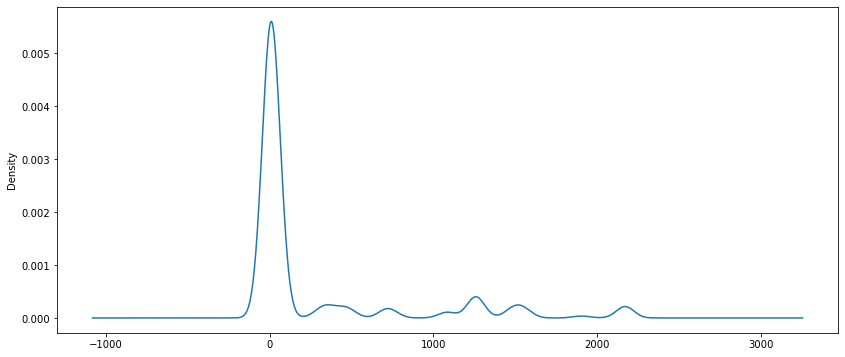

In [21]:
sales["Unit_Cost"].plot(kind = "density", figsize = (14,6)) #kde

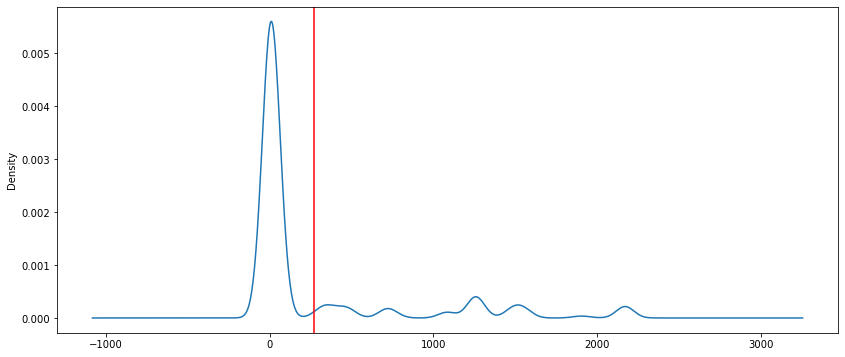

In [26]:
ax = sales["Unit_Cost"].plot(kind = "density", figsize = (14,6))
ax.axvline(sales["Unit_Cost"].mean(), color="red")

In [27]:
ax.axvline(sales["Unit_Cost"].median(), color="green")

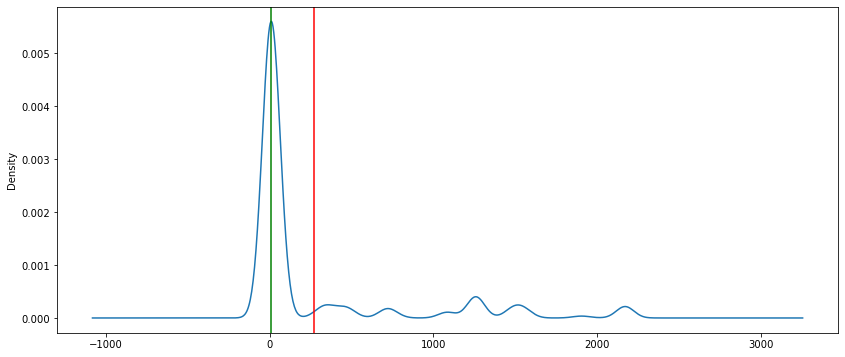

In [28]:
ax = sales["Unit_Cost"].plot(kind = "density", figsize = (14,6))
ax.axvline(sales["Unit_Cost"].mean(), color="red")
ax.axvline(sales["Unit_Cost"].median(), color="green")

Text(0.5, 0, 'Dollars')

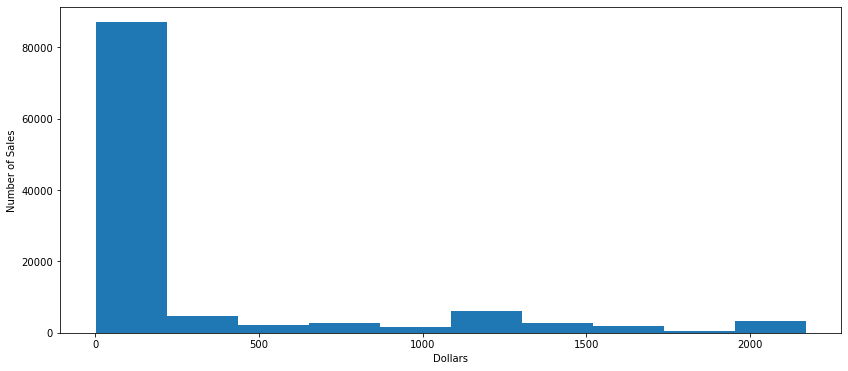

In [29]:
ax = sales["Unit_Cost"].plot(kind = "hist", figsize = (14,6))
ax.set_ylabel("Number of Sales")
ax.set_xlabel("Dollars")

## Categorical Analysis and visualization

Use of Age_Group Column

In [30]:
sales["Age_Group"]

0            Youth (<25)
1            Youth (<25)
2         Adults (35-64)
3         Adults (35-64)
4         Adults (35-64)
               ...      
113031    Adults (35-64)
113032       Youth (<25)
113033       Youth (<25)
113034    Adults (35-64)
113035    Adults (35-64)
Name: Age_Group, Length: 113036, dtype: object

In [31]:
sales["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

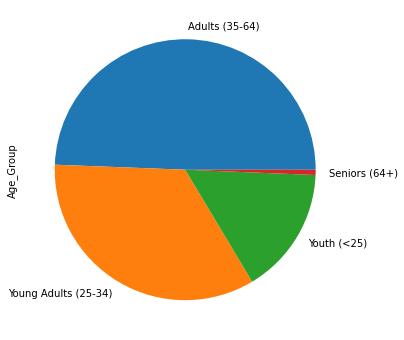

In [32]:
sales["Age_Group"].value_counts().plot(kind = "pie", figsize = (6,6))

Text(0, 0.5, 'Number of Sales')

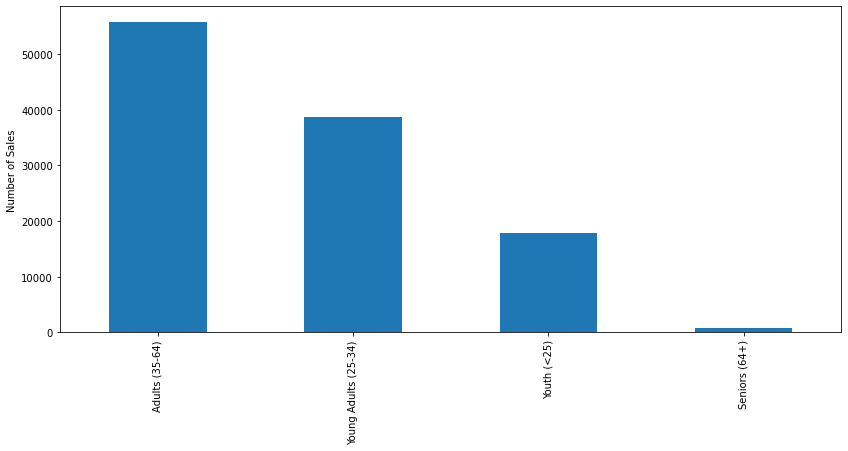

In [33]:
ax = sales["Age_Group"].value_counts().plot(kind = "bar", figsize = (14,6))
ax.set_ylabel("Number of Sales")

In [34]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Relationship between the columns ?

In [35]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


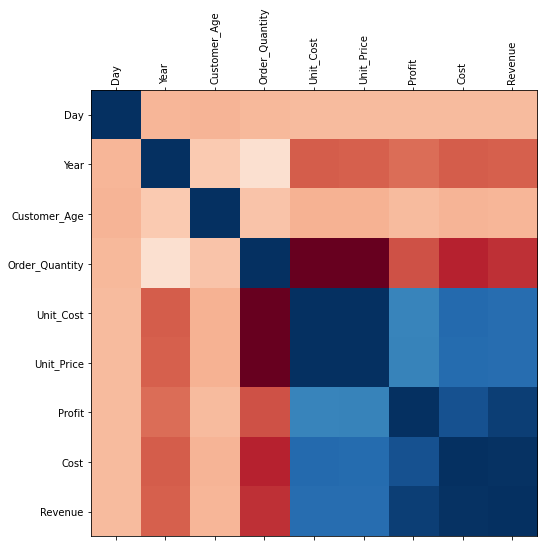

In [36]:
fig = plt.figure(figsize = (8,8))
plt.matshow(corr, cmap="RdBu", fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

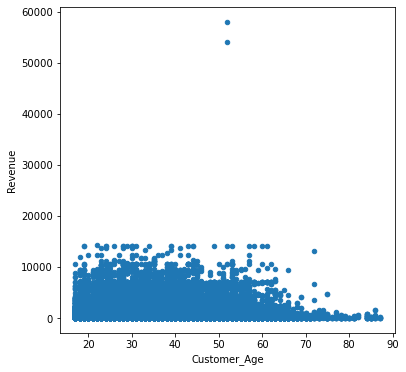

In [37]:
sales.plot(kind = "scatter", x="Customer_Age", y="Revenue", figsize = (6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

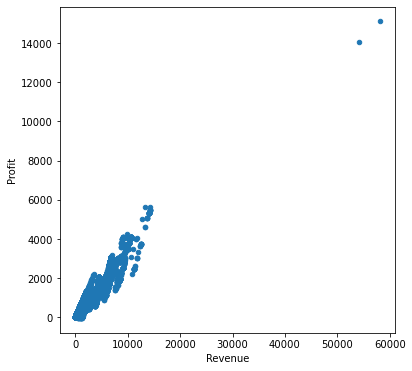

In [38]:
sales.plot(kind = "scatter", x="Revenue", y="Profit", figsize = (6,6))

Text(0, 0.5, 'Profit')

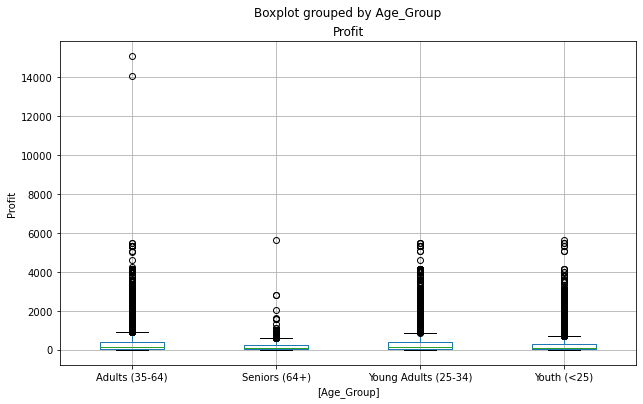

In [41]:
ax = sales[["Profit", "Age_Group"]].boxplot(by="Age_Group", figsize = (10,6))
ax.set_ylabel("Profit")

## Column Wrangling

Add and calculate a new Revenue_per_Age Column

In [43]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [44]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [45]:
sales["Revenue_per_Age"] = sales["Revenue"] / sales["Customer_Age"]

sales["Revenue_per_Age"]

0         50.000000
1         50.000000
2         49.000000
3         42.612245
4          8.893617
            ...    
113031     4.487805
113032    65.722222
113033    65.722222
113034    34.054054
113035    32.621622
Name: Revenue_per_Age, Length: 113036, dtype: float64

In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

<AxesSubplot:ylabel='Density'>

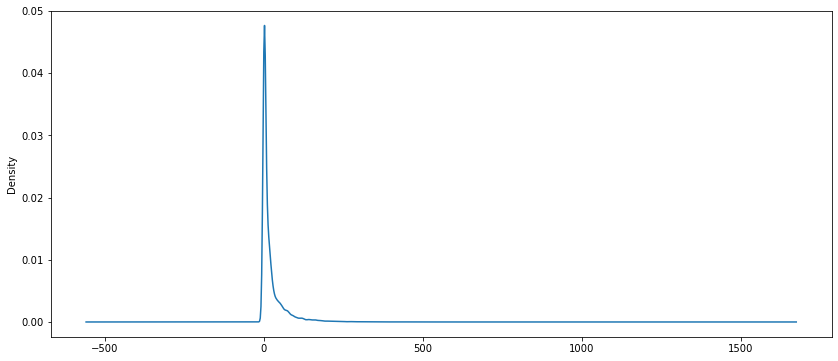

In [47]:
sales["Revenue_per_Age"].plot(kind = "density", figsize = (14, 6))

<AxesSubplot:ylabel='Frequency'>

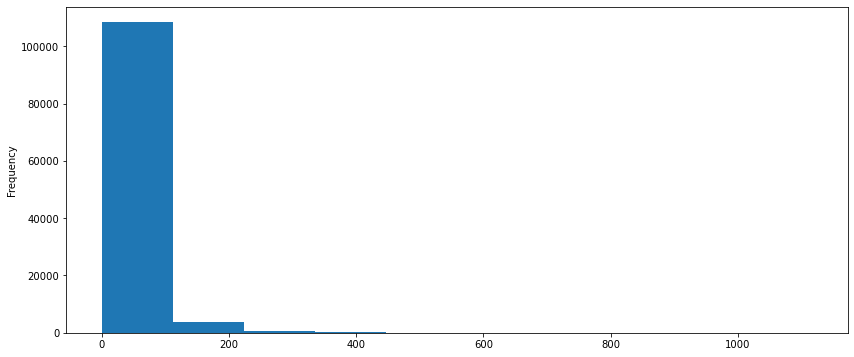

In [48]:
sales["Revenue_per_Age"].plot(kind = "hist", figsize = (14, 6))

 Modify all Unit_Price values adding 3 % tax to them 

In [49]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617


In [50]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [51]:
sales["Unit_Price"]

0         120
1         120
2         120
3         120
4         120
         ... 
113031     64
113032     64
113033     64
113034     64
113035     64
Name: Unit_Price, Length: 113036, dtype: int64

In [52]:
sales["Unit_Price"] = sales["Unit_Price"] * 1.03

In [54]:
sales["Unit_Price"].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [55]:
sales["Unit_Price"] *= 1.03

In [56]:
sales["Unit_Price"] 

0         127.3080
1         127.3080
2         127.3080
3         127.3080
4         127.3080
            ...   
113031     67.8976
113032     67.8976
113033     67.8976
113034     67.8976
113035     67.8976
Name: Unit_Price, Length: 113036, dtype: float64

## SELECTION AND INDEXING 

Get all the sales made in the state of Kentucky

In [57]:
sales["State"]

0         British Columbia
1         British Columbia
2          New South Wales
3          New South Wales
4          New South Wales
                ...       
113031             England
113032          Queensland
113033          Queensland
113034       Seine (Paris)
113035       Seine (Paris)
Name: State, Length: 113036, dtype: object

In [58]:
sales["State"].value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

In [59]:
sales.loc[sales["State"] == "Kentucky"] 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,23.3398,142,96,238,5.950
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,23.3398,165,112,277,6.925
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,37.1315,537,377,914,22.850
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,37.1315,574,403,977,24.425
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,31.8270,32,22,54,1.350
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,31.8270,336,231,567,14.175
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,31.8270,16,11,27,0.675
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,31.8270,288,198,486,12.150


In [60]:
sales.loc[sales["State"] == "Nord"] 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
60,2013-09-24,24,September,2013,32,Young Adults (25-34),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,127.3080,356,270,626,19.562500
61,2015-09-24,24,September,2015,32,Young Adults (25-34),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,127.3080,178,135,313,9.781250
130,2014-07-28,28,July,2014,37,Adults (35-64),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.3080,238,180,418,11.297297
131,2016-07-28,28,July,2016,37,Adults (35-64),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,127.3080,178,135,313,8.459459
236,2014-05-04,4,May,2014,42,Adults (35-64),F,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,16,45,127.3080,950,720,1670,39.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112689,2016-03-09,9,March,2016,18,Youth (<25),F,France,Nord,Clothing,Vests,"Classic Vest, L",6,24,67.8976,190,144,334,18.555556
112696,2014-06-15,15,June,2014,29,Young Adults (25-34),M,France,Nord,Clothing,Vests,"Classic Vest, M",20,24,67.8976,634,480,1114,38.413793
112697,2016-06-15,15,June,2016,29,Young Adults (25-34),M,France,Nord,Clothing,Vests,"Classic Vest, M",17,24,67.8976,539,408,947,32.655172
112718,2013-10-22,22,October,2013,25,Young Adults (25-34),M,France,Nord,Clothing,Vests,"Classic Vest, S",14,24,67.8976,444,336,780,31.200000


 ## GET THE MEAN REVENUE OF THE AUDLTS sales group

In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [62]:
sales["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [63]:
sales["Age_Group"] == "Adults (35-64)"

0         False
1         False
2          True
3          True
4          True
          ...  
113031     True
113032    False
113033    False
113034     True
113035     True
Name: Age_Group, Length: 113036, dtype: bool

In [64]:
adults_value = sales["Age_Group"] == "Adults (35-64)"
sales[adults_value]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,127.3080,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,127.3080,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.3080,238,180,418,8.893617
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,127.3080,297,225,522,11.106383
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.3080,199,180,379,8.063830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,67.8976,75,48,123,3.000000
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,67.8976,225,144,369,9.000000
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,67.8976,112,72,184,4.487805
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,67.8976,684,576,1260,34.054054


In [65]:
sales[adults_value].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,127.308,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,127.308,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.308,238,180,418,8.893617
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,127.308,297,225,522,11.106383
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.308,199,180,379,8.063830


In [66]:
sales.loc[adults_value, "Revenue"]

2         2401
3         2088
4          418
5          522
6          379
          ... 
113029     123
113030     369
113031     184
113034    1260
113035    1207
Name: Revenue, Length: 55824, dtype: int64

In [67]:
sales.loc[adults_value, "Revenue"].mean()

762.8287654055604

 How many records belong to Age Group Youth or Adults ?

In [68]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [69]:
sales.loc[(sales["Age_Group"] == "Youth (<25)") | (sales["Age_Group"] == "Adults (35-64)")]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,127.3080,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,127.3080,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,127.3080,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,127.3080,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,127.3080,238,180,418,8.893617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,67.8976,112,72,184,4.487805
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,67.8976,655,528,1183,65.722222
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,67.8976,655,528,1183,65.722222
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,67.8976,684,576,1260,34.054054


In [71]:
sales.loc[(sales["Age_Group"] == "Youth (<25)") | (sales["Age_Group"] == "Adults (35-64)")].shape

(73652, 19)

In [72]:
sales.loc[(sales["Age_Group"] == "Youth (<25)") | (sales["Age_Group"] == "Adults (35-64)")].shape[0]

73652